# Diabetes Dataset

## Import modules

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import sys
import seaborn as sns
import matplotlib.pyplot as plt

## Data preparation

In [2]:
dir_data = "../data"
path_data = os.path.join(dir_data, "diabetes_data.csv")
df = pd.read_csv(path_data)

#### Basic Sanity Check 

In [3]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [6]:
def multiHist_by_rows_cols(data, nbr_rows, nbr_cols):

    feat = list(data.columns)

    fig, axs = plt.subplots(nbr_rows, nbr_cols, figsize=(3 * nbr_cols, 3 * nbr_rows)) # horizontal * vertical
    
    i =0
    for col_index in range(nbr_cols):#for domain in rows:
        for row_index in range(nbr_rows): #for col in range(1, len(columns) + 1):
            axs[row_index, col_index].set_title('%s'%(feat[i]))
            axs[row_index, col_index].tick_params(labelsize=12)       
            axs[row_index, col_index].hist(data[feat[i]], orientation='horizontal', histtype='step')
            i += 1
    
    plt.tight_layout()
    plt.show()

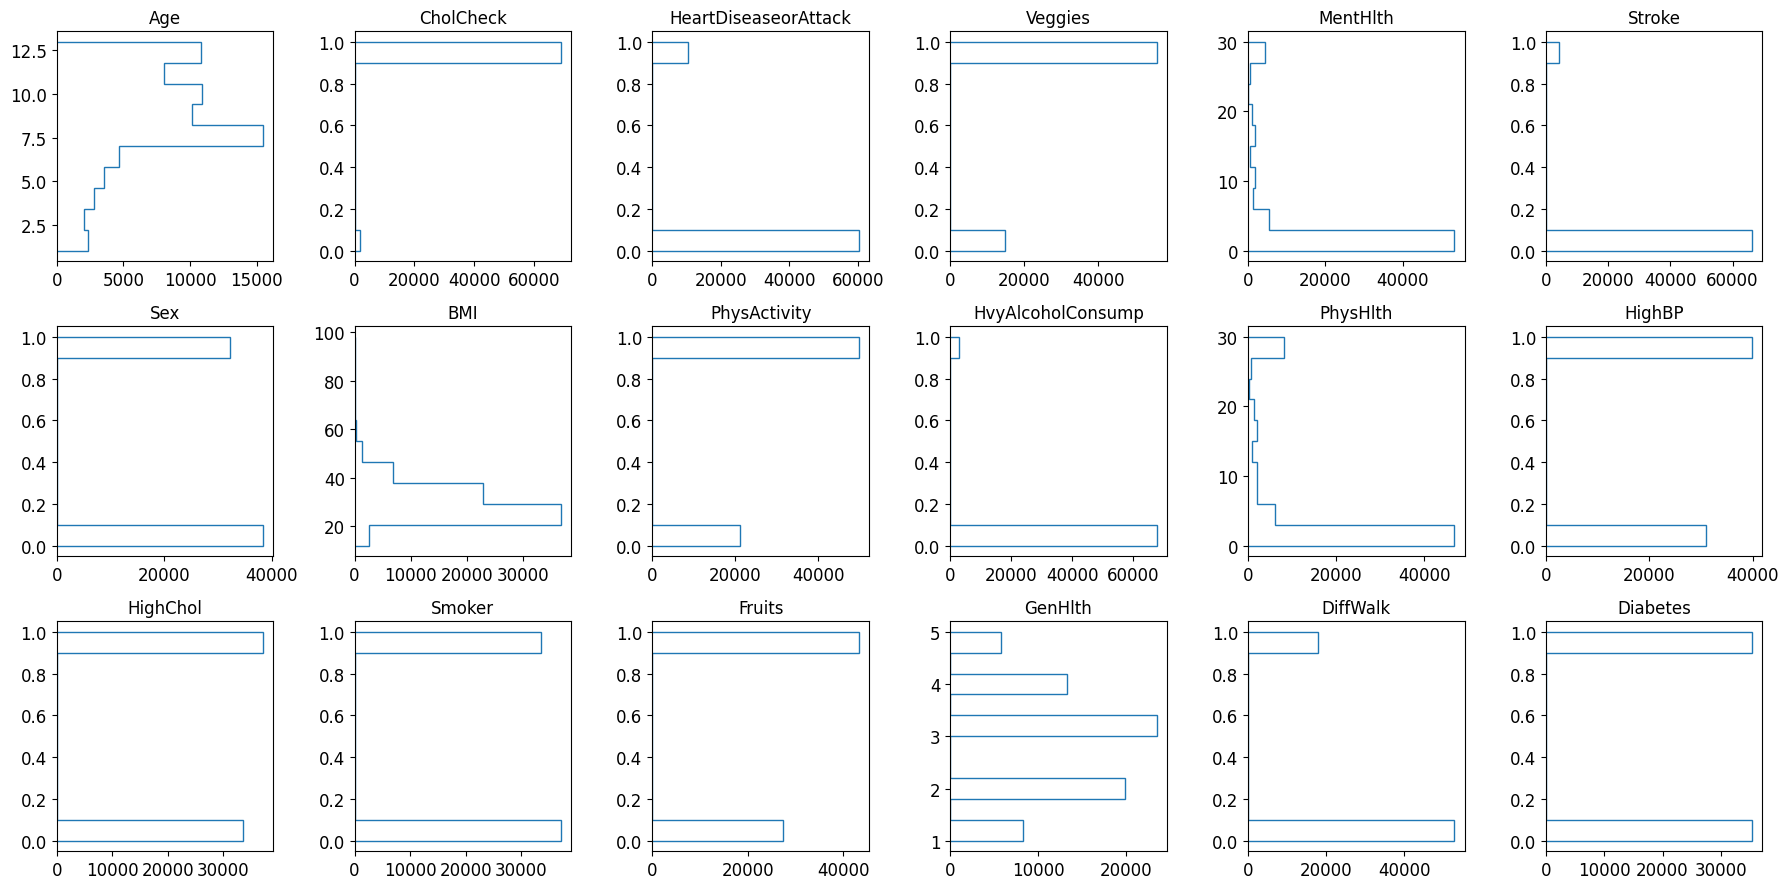

In [7]:
multiHist_by_rows_cols(df, 3, 6)

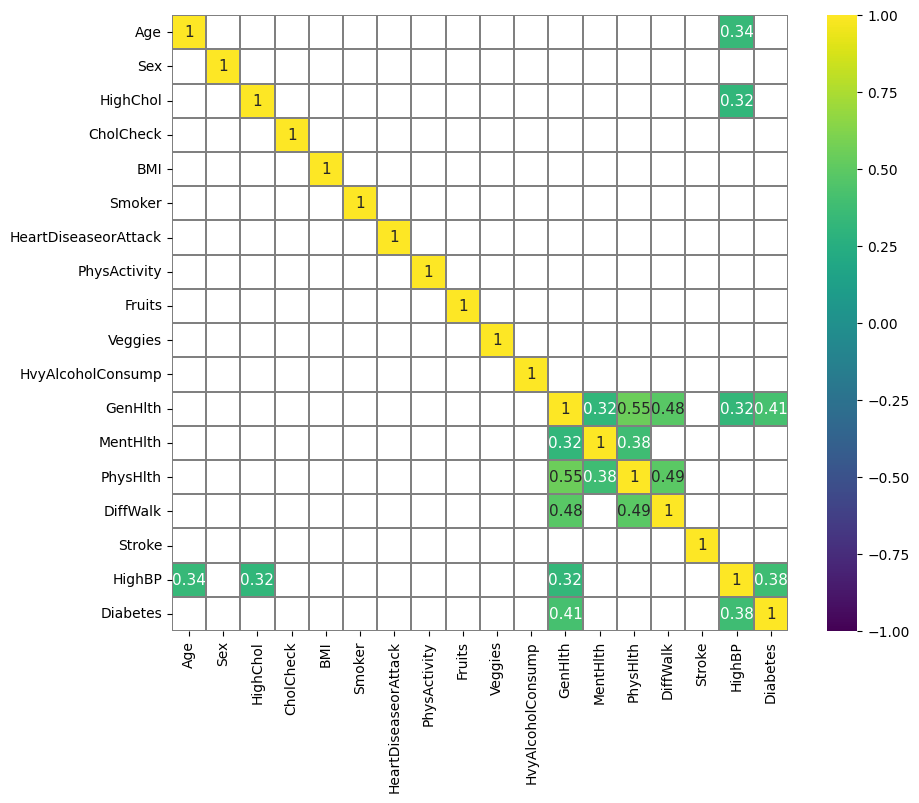

In [8]:
corr = df.corr() 
plt.figure(figsize=(10, 8))

sns.heatmap(corr[(corr > 0.3)| (corr < -0.3)], \
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,\
            annot=True, annot_kws={"size": 11}, square=True,linecolor='gray')
plt.show()

#### To select a subset of features from correlation matrix 

In [11]:
ldf = df[["Age", "HighChol", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "HighBP", "Diabetes"]]

#### To select a small subset from the whole datasets for test ML run

In [10]:
random_state = 42
ldf_sample = ldf.sample(n=3000)
X = ldf_sample.drop(columns=["Diabetes"])
Y = ldf_sample[["Diabetes"]]

In [11]:
X.shape, Y.shape

((3000, 7), (3000, 1))